In [210]:
import numpy as np
import tensorflow.compat.v1 as tf

xtrain = np.genfromtxt('data.in', dtype='float32', delimiter=" ", usecols=(0)).reshape(-1, 1)
ytrain = np.genfromtxt('data.in', dtype='float32', delimiter=" ", usecols=(1)).reshape(-1, 1)

xtrain_squared = np.concatenate((xtrain ** 2, xtrain), axis=1)                    # 2차
xtrain_squared_3 = np.concatenate((xtrain ** 3, xtrain ** 2, xtrain), axis=1)     # 3차

In [258]:
x_data = xtrain_squared_3
y_data = ytrain
data_num = 3
MaxEpochs = 10000

X = tf.placeholder(tf.float32, shape=[None, data_num])
Y = tf.placeholder(tf.float32, shape=[None, 1])
 
# 학습을 통해 구할 변수 지정
W = tf.Variable(tf.random_normal([data_num, 1]), 'weight')
b = tf.Variable(tf.random_normal([1]), 'bias')
 
# 가설
yhat = tf.matmul(X, W) + b
loss = tf.reduce_mean(tf.square(yhat - Y))
lr = 0.001
optimizer = tf.train.GradientDescentOptimizer(lr)
train = optimizer.minimize(loss)


In [259]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(MaxEpochs):
        #loss_val, W_val, b_val, train_val = sess.run([loss, W, b, train], feed_dict={X: x_data, Y: y_data})
        sess.run(train, feed_dict={X: x_data, Y: y_data})
    
    w_value, b_value, predic = sess.run([W, b, yhat], feed_dict={X: x_data})

    print('W : ', w_value)
    print("b : ", b_value)
    print("yhat : ", predic)


('W : ', array([[ 1.0430337 ],
       [-1.094167  ],
       [ 0.14460084]], dtype=float32))
('b : ', array([2.3197665], dtype=float32))
('yhat : ', array([[ 2.3197665],
       [ 2.3203275],
       [ 2.320854 ],
       [ 2.321346 ],
       [ 2.3218043],
       [ 2.3222291],
       [ 2.322621 ],
       [ 2.3229804],
       [ 2.3233075],
       [ 2.3236027],
       [ 2.3238666],
       [ 2.3240995],
       [ 2.3243017],
       [ 2.3244739],
       [ 2.324616 ],
       [ 2.324729 ],
       [ 2.3248127],
       [ 2.324868 ],
       [ 2.324895 ],
       [ 2.3248942],
       [ 2.324866 ],
       [ 2.3248107],
       [ 2.324729 ],
       [ 2.324621 ],
       [ 2.3244872],
       [ 2.324328 ],
       [ 2.324144 ],
       [ 2.323935 ],
       [ 2.3237019],
       [ 2.323445 ],
       [ 2.323165 ],
       [ 2.3228617],
       [ 2.322536 ],
       [ 2.322188 ],
       [ 2.321818 ],
       [ 2.321427 ],
       [ 2.321015 ],
       [ 2.3205822],
       [ 2.3201292],
       [ 2.3196564],
       [ 2.3

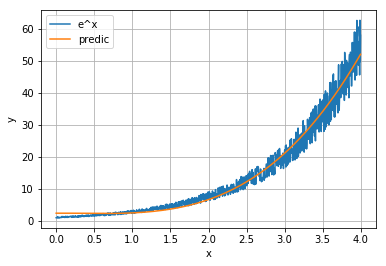

In [260]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(xtrain, ytrain)
plt.plot(xtrain, predic)
plt.legend(['e^x', 'predic'])
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()